### Exercise 6: Build a PCA and t-SNE
##### (15 points) --> your total will divided by 3 to get 5 points for this exercise.


---

In this Exercise, we will reinforce our knowledge of PCA and t-SNE using the Wine dataset.

#####
**Dataset:**
You can find the dataset (wine.data) under the datasets section on the Canvas.

**About Dataset**
The Wine dataset (https://archive.ics.uci.edu/ml/datasets/Wine) is a collection of attributes regarding the chemical analysis of wine from Italy from three different producers, but the same type of wine for each producer. This information could be used as an example to verify the validity of a bottle of wine made from the grapes from a specific region in Italy. The 13 attributes are Alcohol, Malic acid, Ash, Alkalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, and Proline.



To disable Python warnings

In [4]:
import warnings
warnings.filterwarnings("ignore")

### Step to do:

    1. Import pandas, numpy, and matplotlib, as well as the t-SNE and PCA models from scikit-learn (1 point)

In [5]:
import numpy as np
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA

# TSNE
from sklearn.manifold import TSNE

    2. Load the Wine dataset in datafram without header and display the first five rows of data. (1 point)

In [6]:
df = pd.read_csv('wine_data.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


    3. The first column contains the labels; extract this column as labels and remove it from the dataset. (1 point)

In [17]:
labels = df.iloc[:, 0].astype(int).values 
X = df.iloc[:, 1:].values                 


    4.Execute PCA to reduce the dataset to the first six components. (2 points)

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca6 = PCA(n_components=6, random_state=0)
wine_pca = pca6.fit_transform(X_scaled)



    5. Determine the amount of variance within the data described by these six components. (1 point)

In [9]:
explained = pca6.explained_variance_ratio_
print("Explained variance ratio (6 PCs):", ["{:.2f}".format(v) for v in explained])
print("Cumulative variance:", f"{explained.cumsum()[-1]*100:.2f}%")


Explained variance ratio (6 PCs): ['0.36', '0.19', '0.11', '0.07', '0.07', '0.05']
Cumulative variance: 85.10%


    6. Create a t-SNE model using a specified random state and a verbose value of 1 (1 point)

In [10]:

tsne = TSNE(random_state=0, verbose=1, perplexity=30, learning_rate='auto', init='pca')


    7. Fit the data to the t-SNE model. (1 point)

In [11]:
wine_tsne = tsne.fit_transform(wine_pca)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.466075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.745361
[t-SNE] KL divergence after 1000 iterations: 0.332038


    8. Confirm that the shape of the t-SNE fitted data is two-dimensional ( 1 point)

In [12]:
wine_tsne.shape

(178, 2)

    9. Create a scatter plot of the two-dimensional data (first and second features) (2 points)

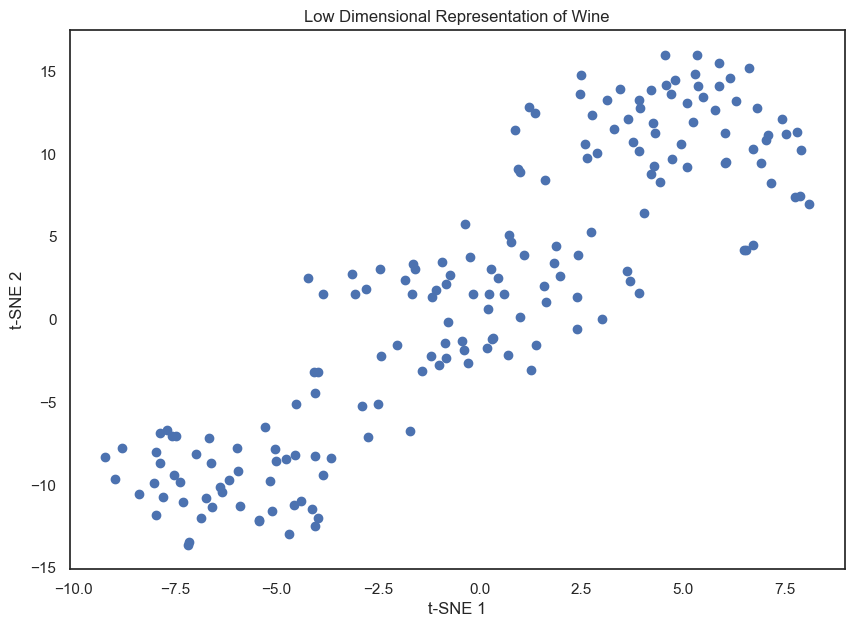

In [13]:
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:
plt.scatter(wine_tsne[:,0], wine_tsne[:,1])
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")
plt.show()


    10. Create a secondary scatter plot of the two-dimensional data with the class labels applied to visualize any clustering that may be present (2 points)

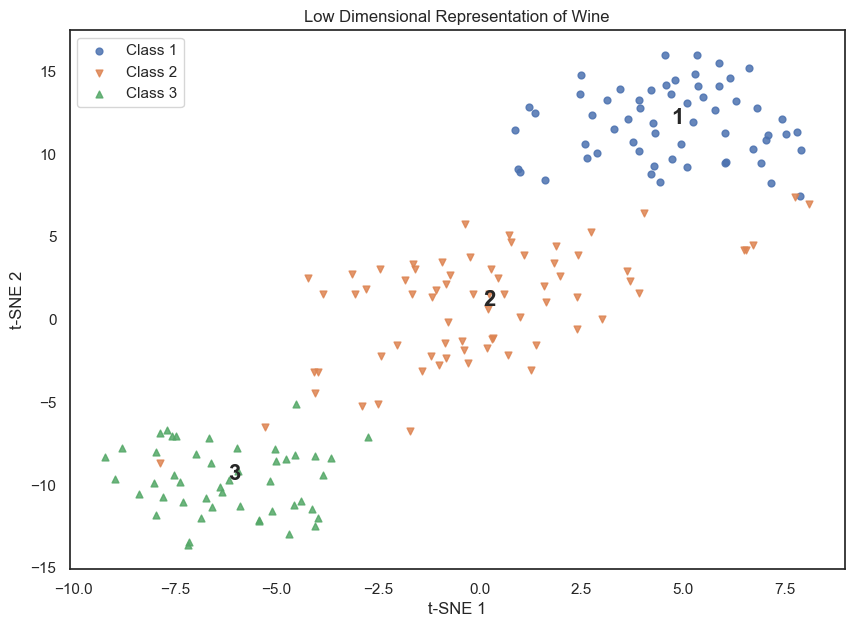

In [14]:
MARKER = ['o', 'v', '^',]
plt.figure(figsize=(10, 7))
plt.title('Low Dimensional Representation of Wine')

## write your code here:
classes = np.unique(labels)  

for i, cls in enumerate(classes):
    sel = wine_tsne[labels == cls]
    plt.scatter(sel[:, 0], sel[:, 1],
                marker=MARKER[i % len(MARKER)],
                s=24, alpha=0.85, label=f'Class {cls}')
    x, y = sel.mean(axis=0)
    plt.text(x, y, str(cls), fontdict={'weight': 'bold', 'size': 16})
plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2"); plt.legend()
plt.show()


    11. Construct a loop that iterates through the perplexity values (1, 5, 20, 30, 80, 160, 320). For each loop, generate a t-SNE model with the corresponding perplexity and print a scatter plot of the labeled wine classes. Note the effect of different perplexity values. (2 points)

t-SNE’s perplexity must be < number of samples (Wine has 178 rows) so i dropped perplexity value 320.

[t-SNE] Computing 4 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.095652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.997391
[t-SNE] KL divergence after 1000 iterations: 0.451395


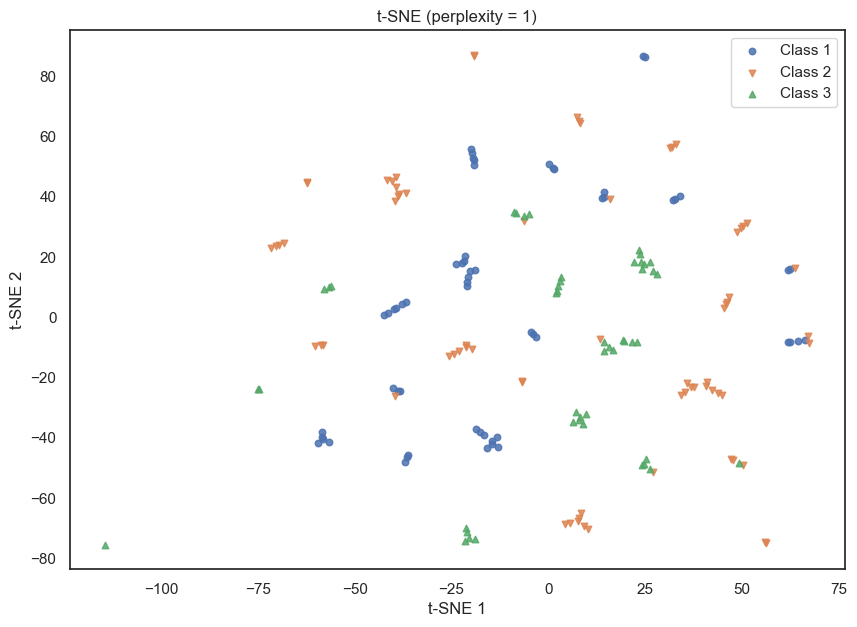

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 0.706970
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.163712
[t-SNE] KL divergence after 1000 iterations: 0.607471


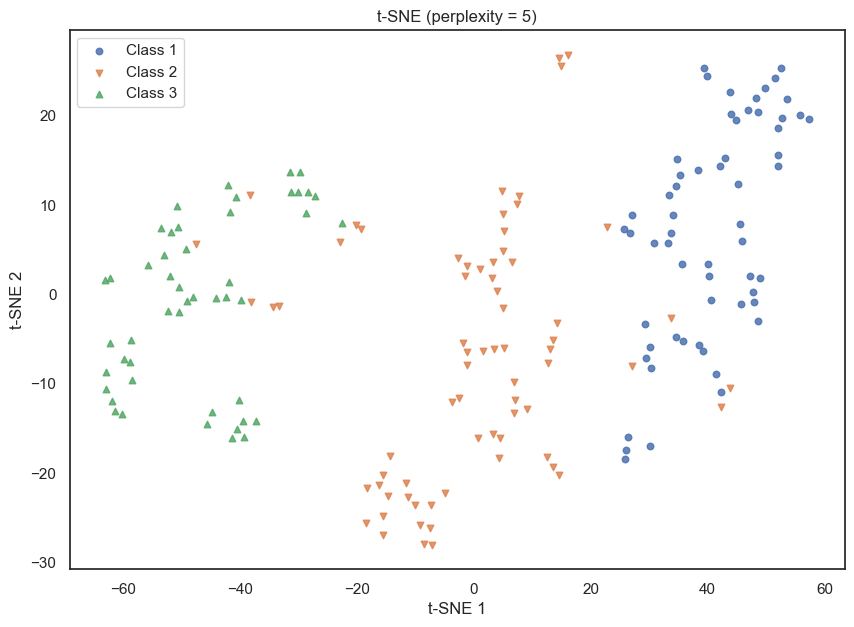

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.227421
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.075283
[t-SNE] KL divergence after 1000 iterations: 0.412892


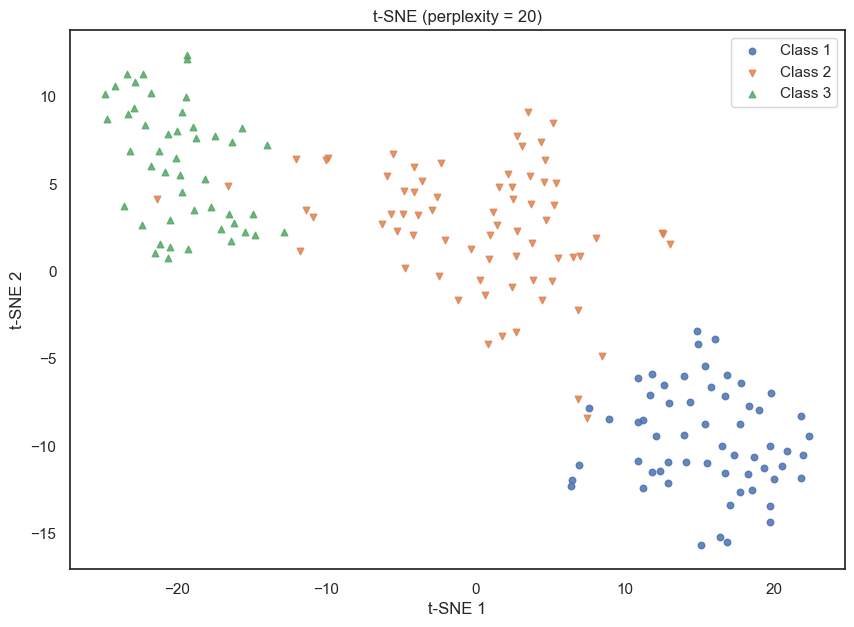

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.466075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.745361
[t-SNE] KL divergence after 1000 iterations: 0.332038


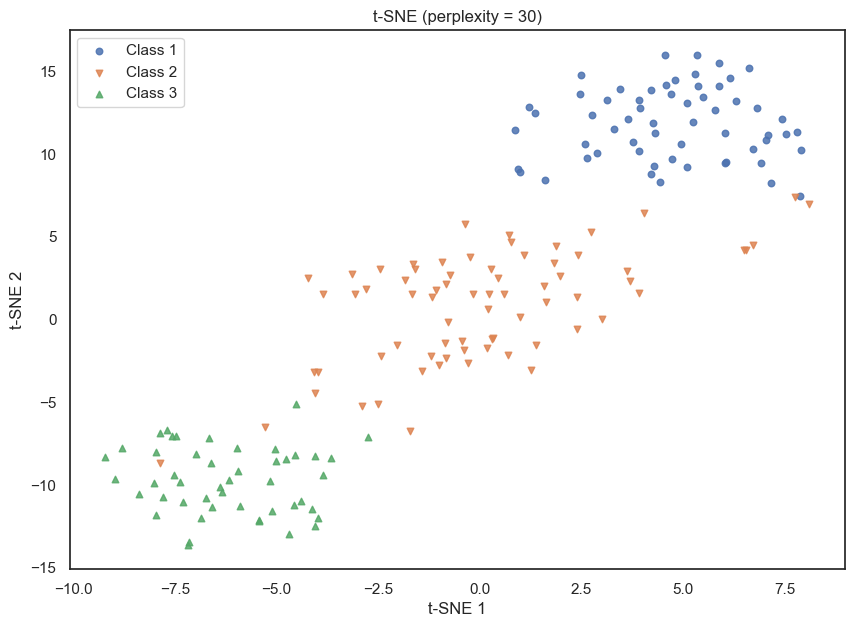

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 2.480449
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.720345
[t-SNE] KL divergence after 900 iterations: 0.132359


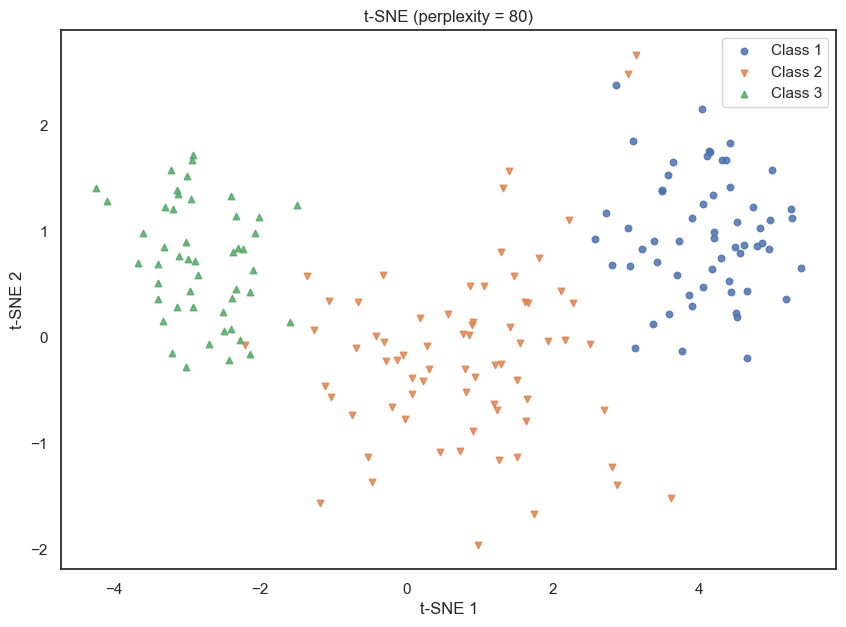

[t-SNE] Computing 177 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 4.934151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 30.935509
[t-SNE] KL divergence after 700 iterations: 0.015507


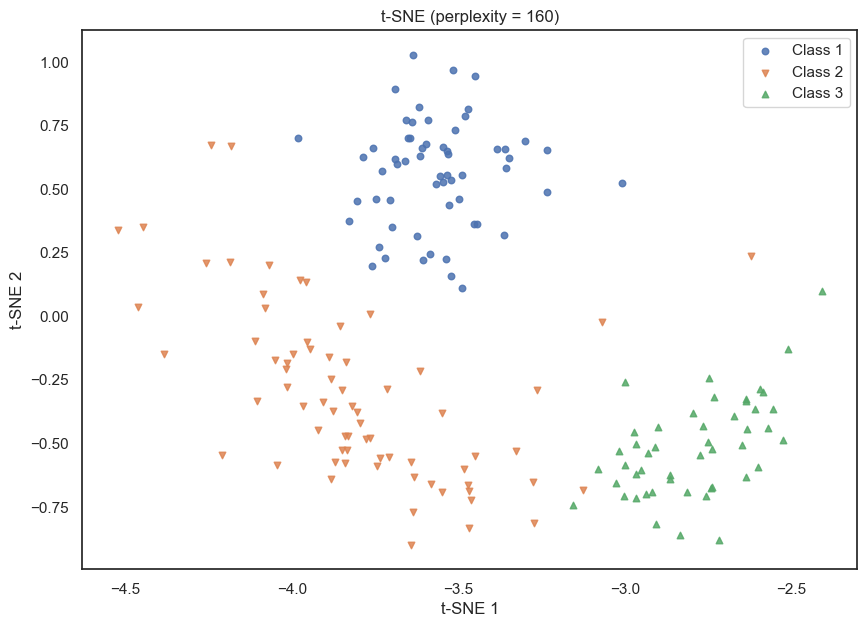

In [15]:
MARKER = ['o', 'v', '^',]
classes = np.unique(labels)

for perp in [1, 5, 20, 30, 80, 160]:
## write your code here:
    tsne_p = TSNE(random_state=0, verbose=1,
                  perplexity=perp, learning_rate='auto', init='pca')
    wine_tsne_p = tsne_p.fit_transform(wine_pca)

    plt.figure(figsize=(10, 7))
    plt.title(f't-SNE (perplexity = {perp})')

    for i, cls in enumerate(classes):
        sel = wine_tsne_p[labels == cls]
        plt.scatter(sel[:, 0], sel[:, 1],
                    marker=MARKER[i % len(MARKER)],
                    s=22, alpha=0.85, label=f'Class {cls}')

    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.legend()
    plt.show()

Construct a loop that iterates through the iteration values (250, 500, 1000). For each loop, generate a t-SNE model with the corresponding number of iterations and identical number of iterations without progress values:

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.466075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.745361
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.466075
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.745361
[t-SNE] KL divergen

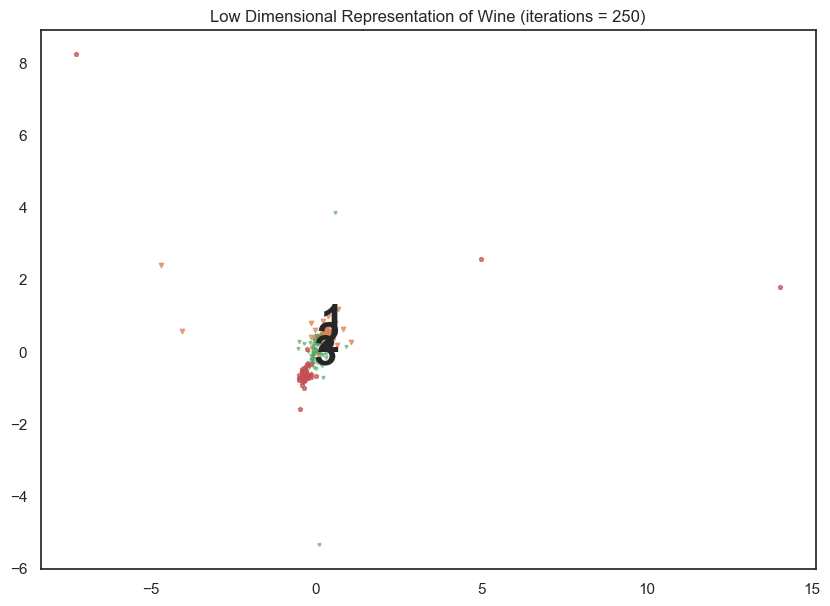

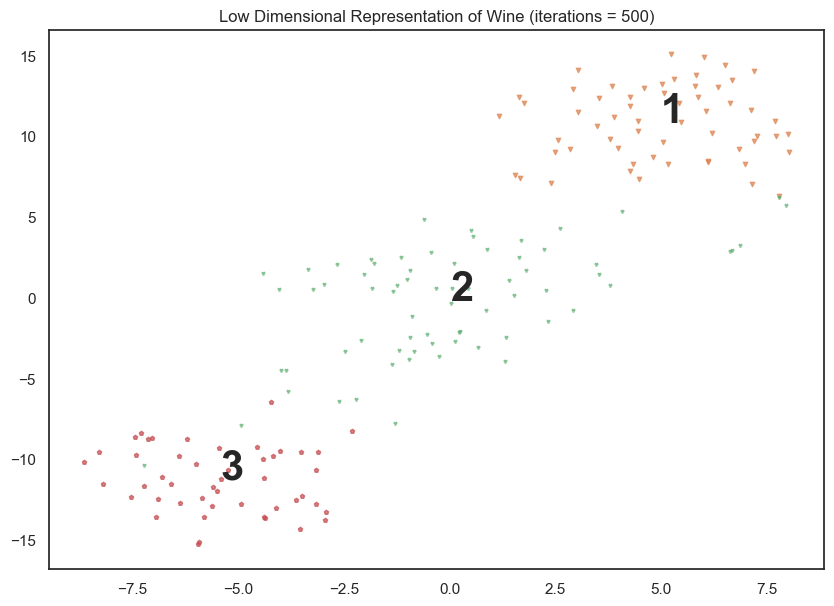

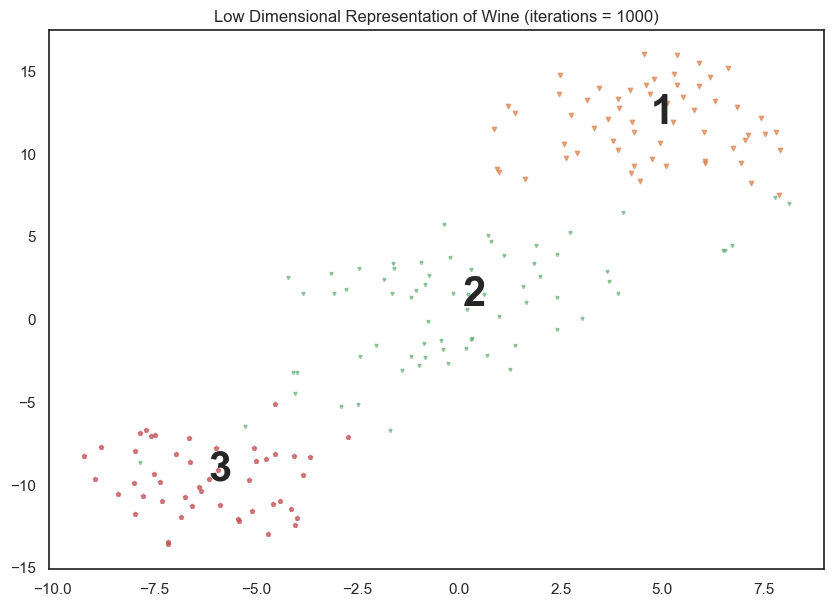

In [16]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
for iterations in [250, 500, 1000]:
    model_tsne = TSNE(random_state=0, verbose=1, n_iter=iterations, n_iter_without_progress=iterations)
    wine_tsne = model_tsne.fit_transform(wine_pca)
    plt.figure(figsize=(10, 7))
    plt.title(f'Low Dimensional Representation of Wine (iterations = {iterations})');
    for i in range(10):
        selections = wine_tsne[labels == i]
        plt.scatter(selections[:,0], selections[:,1], alpha=0.7, marker=MARKER[i], s=10);
        x, y = selections.mean(axis=0)
        plt.text(x, y, str(i), fontdict={'weight': 'bold', 'size': 30})
plt.show()